In [37]:
import numpy as np
import pandas as pd
import glob
import math

In [2]:
dir_path = 'C:/Users/IshaA/OneDrive/Desktop/Design Project/CICIoT2023'
file_extension = '.csv'

In [3]:
#Getting the list of csv files from dir_path using glob()
csv_files = glob.glob(dir_path + "/*" + file_extension)

In [ ]:
#Don't run again
dataframe = pd.DataFrame()
for file in csv_files:
    df = pd.read_csv(file)
    attack_types = df.label.unique()
    for attack_type in attack_types:
        temp_df = df.loc[df['label'] == attack_type].sample(frac = 0.1)
        dataframe = pd.concat([dataframe, temp_df])
dataframe = dataframe.sample(frac = 1).reset_index(drop=True)

In [13]:
#Don't run again
dataframe.to_csv(r'C:\Users\IshaA\OneDrive\Desktop\Design Project\iot_network_attacks.csv')

In [4]:
dataframe = pd.read_csv('iot_network_attacks.csv').drop(['Unnamed: 0'], axis=1)

In [5]:
dataframe.head(10)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.208228,39635.00,17.00,64.00,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.312351e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
1,2.980976,1436693.74,17.00,64.00,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.000000,554.00,8.370738e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain
2,0.000000,54.00,6.00,64.00,2.667254,2.667254,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336257e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
3,6.099762,1500509.00,17.00,64.00,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.000000,554.00,8.370724e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain
4,0.000000,0.00,1.00,64.00,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314958e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
5,0.000000,1.05,46.70,64.64,0.751168,0.751168,0.0,0.0,0.0,0.0,...,29.010529,587.13,8.367745e+07,9.5,33.821629,41.063944,4752.719500,0.19,141.55,Mirai-greeth_flood
6,2.608820,2917087.00,17.00,64.00,2018.331388,2018.331388,0.0,0.0,0.0,0.0,...,0.000000,554.00,8.378495e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain
7,0.000000,0.00,0.98,62.72,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.752638,42.36,8.315070e+07,9.5,9.237425,2.481330,9.879618,0.33,141.55,DDoS-ICMP_Flood
8,0.000000,54.00,6.00,64.00,416.328751,416.328751,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.333104e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
9,0.029625,6.44,1.16,64.00,0.675141,0.675141,0.0,0.0,0.0,0.0,...,1.235477,44.80,8.315019e+07,9.5,9.194896,1.768421,78.182825,0.02,141.55,DDoS-ICMP_Flood


In [6]:
dataframe.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [7]:
print("Dataframe Shape: " + str(dataframe.shape))

Dataframe Shape: (4668653, 47)


In [8]:
import matplotlib.pyplot as plt

In [9]:
dataframe_description = dataframe.describe().T
del dataframe_description['count']
dataframe_description

,mean,std,min,25%,50%,75%,max
flow_duration,5.744036e+00,2.818787e+02,0.000000,0.000000e+00,0.000000e+00,1.049814e-01,1.454152e+05
Header_Length,7.663371e+04,4.619134e+05,0.000000,5.400000e+01,5.400000e+01,2.850500e+02,9.887804e+06
Protocol Type,9.066163e+00,8.946229e+00,0.000000,6.000000e+00,6.000000e+00,1.433000e+01,4.700000e+01
Duration,6.635127e+01,1.401010e+01,0.000000,6.400000e+01,6.400000e+01,6.400000e+01,2.550000e+02
Rate,8.986646e+03,9.828438e+04,0.000000,2.092587e+00,1.574829e+01,1.173175e+02,8.388608e+06
Srate,8.986646e+03,9.828438e+04,0.000000,2.092587e+00,1.574829e+01,1.173175e+02,8.388608e+06
Drate,4.215305e-06,2.834525e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.022185e+00
fin_flag_number,8.657015e-02,2.812042e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
syn_flag_number,2.073354e-01,4.053979e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
rst_flag_number,9.051176e-02,2.869136e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [10]:
#Multi-classification: 33 individual attacks + benign traffic = 34 classes
attack_types_MC = dataframe['label'].unique()
attack_types_counts_MC = dataframe.value_counts('label')
#Grouped classification: 7 attack groups: DDoS, DoS, Recon, Web-Based, BruteForce, Spoofing, Mirai + benign traffic = 8 classes
attack_types_GC = ['DDoS', 'DoS', 'Recon', 'Web-Based', 'BruteForce', 'Spoofing', 'Mirai', 'BenignTraffic']
attack_types_counts_GC = np.zeros(len(attack_types_GC), dtype=int)
for i in range(8):
    if i not in [1,2,3]:
        attack_types_counts_GC[i] = dataframe[dataframe['label'].str.contains(attack_types_GC[i])].shape[0]
    if i == 1:
        attack_types_counts_GC[1] = dataframe[dataframe['label'].str.contains('DoS') & ~dataframe['label'].str.contains('DDoS')].shape[0]
    if i == 2:
        attack_types_counts_GC[2] = dataframe[dataframe['label'].str.contains('Recon') | dataframe['label'].str.contains('VulnerabilityScan')].shape[0]
    if i == 3:
        wb = ['SqlInjection', 'CommandInjection', 'Uploading_Attack','Backdoor_Malware', 'BrowserHijacking', 'XSS']
        attack_types_counts_GC[3] = dataframe[dataframe['label'].str.contains('|'.join(wb))].shape[0]
#Binary classification: Malcious and Benign traffic = 2 classes
attack_types_BC = ['MaliciousTraffic', 'BenignTraffic']
benign_traffic_count = dataframe[dataframe['label'].str.contains('BenignTraffic')].shape[0]
attack_types_counts_BC = [(dataframe.shape[0] - benign_traffic_count), benign_traffic_count]

### Distribution of Counts of the network attacks from a multi-class, grouped, and binary perspective

Text(0, 0.5, 'Counts')

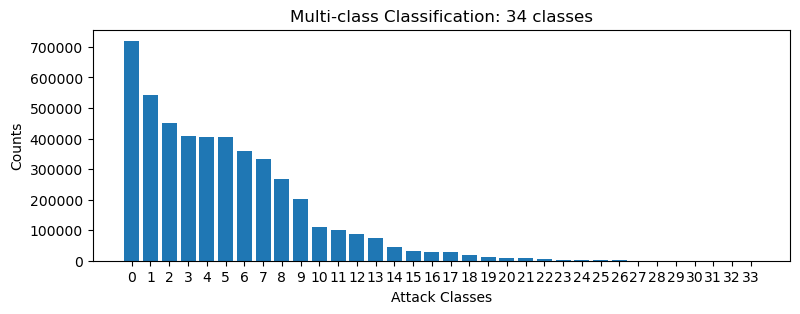

In [11]:
#Multi-class classification: 34 classes
attack_MC_list = list(attack_types_counts_MC)
x_labels = [i for i in range(len(attack_types_MC))]
plt.figure(figsize=(9,3))
fig = plt.bar(x_labels, attack_MC_list)
ax = plt.gca()
ax.set_xticks(x_labels)
plt.title("Multi-class Classification: 34 classes")
plt.xlabel("Attack Classes")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

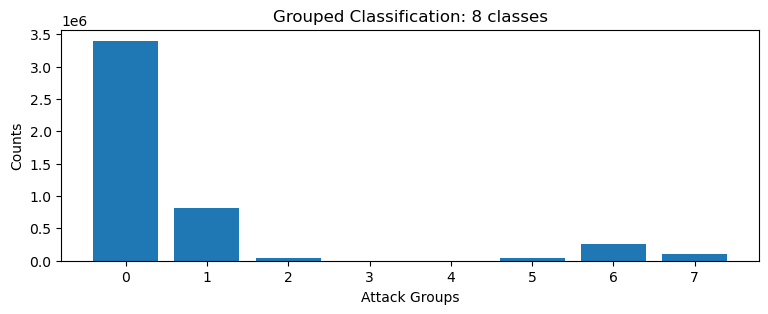

In [12]:
#Grouped classification: 8 classes
attack_GC_list = list(attack_types_counts_GC)
x_labels = [i for i in range(len(attack_types_GC))]
plt.figure(figsize=(9,3))
fig = plt.bar(x_labels, attack_GC_list)
ax = plt.gca()
ax.set_xticks(x_labels)
plt.title("Grouped Classification: 8 classes")
plt.xlabel("Attack Groups")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

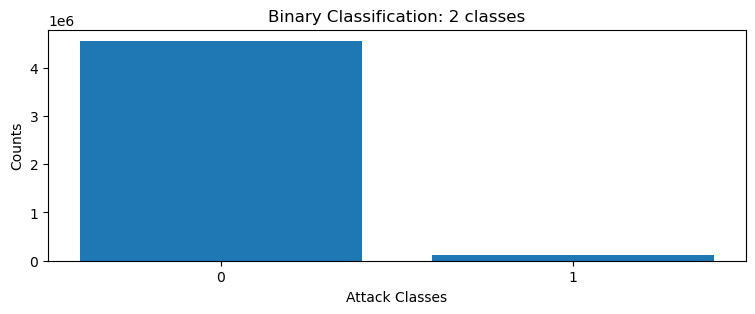

In [13]:
#Binary classification: 2 classes
attack_BC_list = list(attack_types_counts_BC)
x_labels = [i for i in range(len(attack_types_BC))]
plt.figure(figsize=(9,3))
fig = plt.bar(x_labels, attack_BC_list)
ax = plt.gca()
ax.set_xticks(x_labels)
plt.title("Binary Classification: 2 classes")
plt.xlabel("Attack Classes")
plt.ylabel("Counts")

In [14]:
!pip install tensorflow

### Feature Selection using Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
#Spliting the dataframe into training and testing sets
from sklearn.model_selection import train_test_split

X = dataframe[list(dataframe.columns.values[0:46])]
y = dataframe[dataframe.columns.values[46]]

attacks = dataframe['label'].unique()
y = y.replace(to_replace = attacks, value = [index for index in range(len(attacks))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [17]:
X.head(10)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.208228,39635.00,17.00,64.00,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,50.000000,0.000000,50.00,8.312351e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55
1,2.980976,1436693.74,17.00,64.00,870.403002,870.403002,0.0,0.0,0.0,0.0,...,554.000000,0.000000,554.00,8.370738e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55
2,0.000000,54.00,6.00,64.00,2.667254,2.667254,0.0,0.0,1.0,0.0,...,54.000000,0.000000,54.00,8.336257e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
3,6.099762,1500509.00,17.00,64.00,457.658903,457.658903,0.0,0.0,0.0,0.0,...,554.000000,0.000000,554.00,8.370724e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55
4,0.000000,0.00,1.00,64.00,0.646368,0.646368,0.0,0.0,0.0,0.0,...,42.000000,0.000000,42.00,8.314958e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55
5,0.000000,1.05,46.70,64.64,0.751168,0.751168,0.0,0.0,0.0,0.0,...,574.479008,29.010529,587.13,8.367745e+07,9.5,33.821629,41.063944,4752.719500,0.19,141.55
6,2.608820,2917087.00,17.00,64.00,2018.331388,2018.331388,0.0,0.0,0.0,0.0,...,554.000000,0.000000,554.00,8.378495e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55
7,0.000000,0.00,0.98,62.72,0.000000,0.000000,0.0,0.0,0.0,0.0,...,42.674186,1.752638,42.36,8.315070e+07,9.5,9.237425,2.481330,9.879618,0.33,141.55
8,0.000000,54.00,6.00,64.00,416.328751,416.328751,0.0,0.0,0.0,0.0,...,54.000000,0.000000,54.00,8.333104e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
9,0.029625,6.44,1.16,64.00,0.675141,0.675141,0.0,0.0,0.0,0.0,...,42.287368,1.235477,44.80,8.315019e+07,9.5,9.194896,1.768421,78.182825,0.02,141.55


In [18]:
attacks_indexes = pd.DataFrame([attacks, [index for index in range(len(attacks))]]).T
attacks_indexes.columns = ['Attacks', 'Attack_Indexes']
attacks_indexes

,Attacks,Attack_Indexes
0,DDoS-UDP_Flood,0
1,Mirai-udpplain,1
2,DDoS-SynonymousIP_Flood,2
3,DDoS-ICMP_Flood,3
4,Mirai-greeth_flood,4
5,DDoS-PSHACK_Flood,5
6,Mirai-greip_flood,6
7,DDoS-SYN_Flood,7
8,DDoS-TCP_Flood,8
9,DoS-SYN_Flood,9


In [19]:
y.head(10)

0    0
1    1
2    2
3    1
4    3
5    4
6    1
7    3
8    5
9    3
Name: label, dtype: int64

In [20]:
print("X_train.shape: {}\ny_train.shape: {}\nX_test.shape: {}\ny_test.shape: {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape: (3734922, 46)
y_train.shape: (3734922,)
X_test.shape: (933731, 46)
y_test.shape: (933731,)


In [21]:
features = list(dataframe.columns)

In [26]:
#Don't run again
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [27]:
#Don't run again
#Saving the Random Forest Regressor Model
import pickle
filename = r'C:\Users\IshaA\OneDrive\Desktop\Design Project\rfr_model.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [22]:
#Reloading the model
import pickle
filename = r'C:\Users\IshaA\OneDrive\Desktop\Design Project\rfr_model.sav'
loaded_rfr_model = pickle.load(open(filename, 'rb'))

Text(0, 0.5, 'Features')

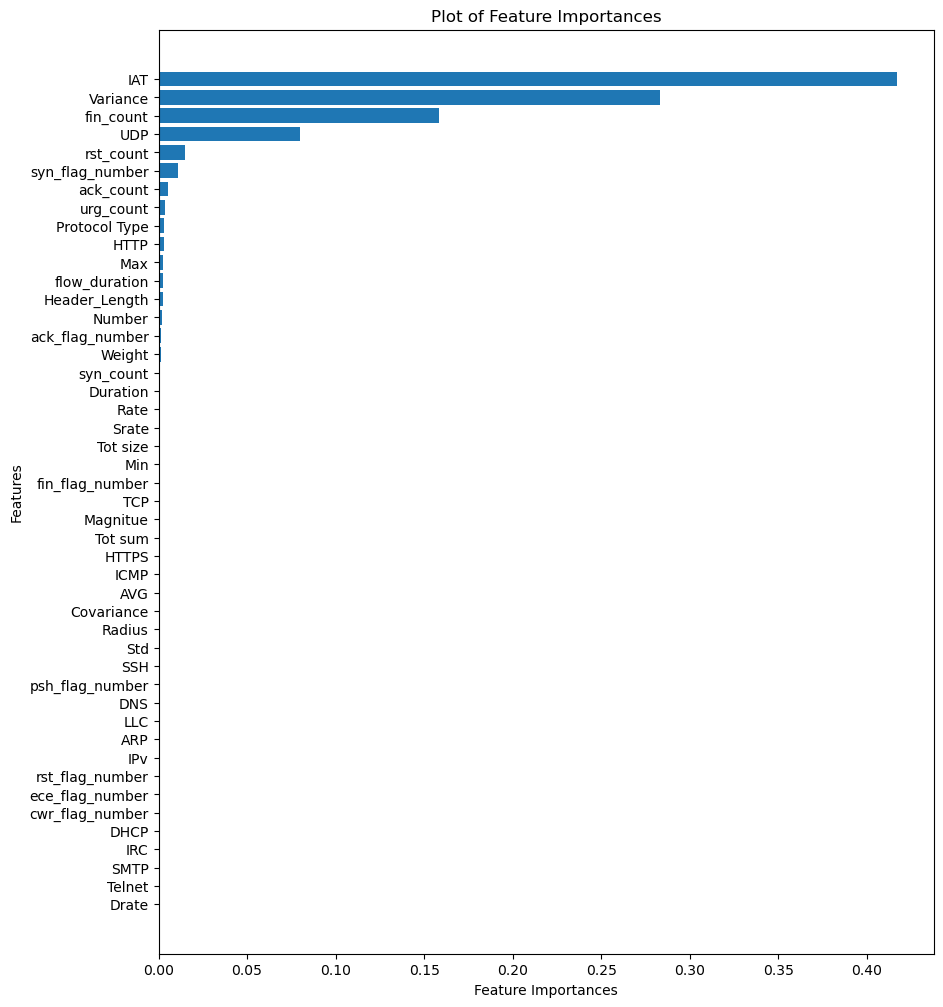

In [23]:
#Displaying the feature importances
f_i = list(zip(features,loaded_rfr_model.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize=(10,12))
plt.barh([x[0] for x in f_i], [x[1] for x in f_i])
plt.title("Plot of Feature Importances")
plt.xlabel("Feature Importances")
plt.ylabel("Features")

In [24]:
#Feature Importances
f_i

[('Drate', 0.0),
 ('Telnet', 0.0),
 ('SMTP', 0.0),
 ('IRC', 0.0),
 ('DHCP', 0.0),
 ('cwr_flag_number', 6.76215698823566e-09),
 ('ece_flag_number', 1.0268770219247107e-08),
 ('rst_flag_number', 3.962945719227314e-06),
 ('IPv', 4.904865430979027e-06),
 ('ARP', 5.219738984942013e-06),
 ('LLC', 5.4180603442768264e-06),
 ('DNS', 6.935730215549498e-06),
 ('psh_flag_number', 5.073822304185223e-05),
 ('SSH', 9.071878373426682e-05),
 ('Std', 0.0002004899709005076),
 ('Radius', 0.00020376388291029694),
 ('Covariance', 0.0002705390826352141),
 ('AVG', 0.000287900019703618),
 ('ICMP', 0.00036661592108945545),
 ('HTTPS', 0.00037114855140828217),
 ('Tot sum', 0.00042447480255103484),
 ('Magnitue', 0.00044882840324354594),
 ('TCP', 0.00047000632138399415),
 ('fin_flag_number', 0.0004934302236849508),
 ('Min', 0.0005246275809194843),
 ('Tot size', 0.0006372658245772096),
 ('Srate', 0.0006915086761277746),
 ('Rate', 0.0007349687027546412),
 ('Duration', 0.0007492940491185033),
 ('syn_count', 0.00098898

In [25]:
#Selecting the top 20 features of the dataset
k = 20
top_k_features = f_i[-20:]
top_k_features = [tkf[0] for tkf in top_k_features]
top_k_features

['Srate',
 'Rate',
 'Duration',
 'syn_count',
 'Weight',
 'ack_flag_number',
 'Number',
 'Header_Length',
 'flow_duration',
 'Max',
 'HTTP',
 'Protocol Type',
 'urg_count',
 'ack_count',
 'syn_flag_number',
 'rst_count',
 'UDP',
 'fin_count',
 'Variance',
 'IAT']

In [26]:
import copy
reduced_df = dataframe.copy(deep=True)
reduced_df = reduced_df.loc[:, reduced_df.columns.isin(top_k_features)]
reduced_df = pd.concat([reduced_df, pd.DataFrame(dataframe['label'])], axis = 1)

In [27]:
reduced_df.head(10)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,ack_flag_number,ack_count,syn_count,...,urg_count,rst_count,HTTP,UDP,Max,IAT,Number,Variance,Weight,label
0,0.208228,39635.00,17.00,64.00,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.00,8.312351e+07,9.5,0.00,141.55,DDoS-UDP_Flood
1,2.980976,1436693.74,17.00,64.00,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.00,8.370738e+07,9.5,0.00,141.55,Mirai-udpplain
2,0.000000,54.00,6.00,64.00,2.667254,2.667254,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,54.00,8.336257e+07,9.5,0.00,141.55,DDoS-SynonymousIP_Flood
3,6.099762,1500509.00,17.00,64.00,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.00,8.370724e+07,9.5,0.00,141.55,Mirai-udpplain
4,0.000000,0.00,1.00,64.00,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.00,8.314958e+07,9.5,0.00,141.55,DDoS-ICMP_Flood
5,0.000000,1.05,46.70,64.64,0.751168,0.751168,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,587.13,8.367745e+07,9.5,0.19,141.55,Mirai-greeth_flood
6,2.608820,2917087.00,17.00,64.00,2018.331388,2018.331388,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.00,8.378495e+07,9.5,0.00,141.55,Mirai-udpplain
7,0.000000,0.00,0.98,62.72,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47.94,8.315070e+07,9.5,0.33,141.55,DDoS-ICMP_Flood
8,0.000000,54.00,6.00,64.00,416.328751,416.328751,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,54.00,8.333104e+07,9.5,0.00,141.55,DDoS-PSHACK_Flood
9,0.029625,6.44,1.16,64.00,0.675141,0.675141,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47.60,8.315019e+07,9.5,0.02,141.55,DDoS-ICMP_Flood


In [28]:
print("Shape of Dataframe after feature selection: " + str(reduced_df.shape))

Shape of Dataframe after feature selection: (4668653, 21)


### Binary Classification : 2 classes

In [29]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
#Creating the Dataframe for Binary Classification
dataframe_BC = reduced_df.copy(deep=True)
dataframe_BC.loc[dataframe_BC['label'].str.contains('BenignTraffic') == False, 'label'] = 'MaliciousTraffic'
dataframe_BC

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,ack_flag_number,ack_count,syn_count,...,urg_count,rst_count,HTTP,UDP,Max,IAT,Number,Variance,Weight,label
0,0.208228,39635.00,17.0,64.0,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,8.312351e+07,9.5,0.0,141.55,MaliciousTraffic
1,2.980976,1436693.74,17.0,64.0,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370738e+07,9.5,0.0,141.55,MaliciousTraffic
2,0.000000,54.00,6.0,64.0,2.667254,2.667254,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,54.0,8.336257e+07,9.5,0.0,141.55,MaliciousTraffic
3,6.099762,1500509.00,17.0,64.0,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370724e+07,9.5,0.0,141.55,MaliciousTraffic
4,0.000000,0.00,1.0,64.0,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.314958e+07,9.5,0.0,141.55,MaliciousTraffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668648,0.000000,0.00,1.0,64.0,257.928481,257.928481,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312489e+07,9.5,0.0,141.55,MaliciousTraffic
4668649,5.177342,108.00,6.0,64.0,0.386299,0.386299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54.0,8.295085e+07,9.5,0.0,141.55,MaliciousTraffic
4668650,0.000000,54.00,6.0,64.0,1.499815,1.499815,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,54.0,8.331443e+07,9.5,0.0,141.55,MaliciousTraffic
4668651,0.000000,0.00,1.0,64.0,44.164748,44.164748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312483e+07,9.5,0.0,141.55,MaliciousTraffic


In [31]:
#Spliting the reduced dataset into train and test
X = dataframe_BC.iloc[:,:-1]
y = dataframe_BC.iloc[:,-1]

#attack_types_BC = ["MaliciousTraffic", "BenignTraffic"]
y = y.replace(to_replace = attack_types_BC, value = [index for index in range(len(attack_types_BC))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [32]:
# Data preprocessing - scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [33]:
lr = LogisticRegression(random_state=0, max_iter=300)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [34]:
lr_BC_accuracy = accuracy_score(y_test, lr_pred)
lr_BC_recall = recall_score(y_test, lr_pred)
lr_BC_precision = precision_score(y_test, lr_pred)
lr_BC_f1 = f1_score(y_test, lr_pred)

In [35]:
from sklearn.metrics import confusion_matrix
lr_BC_confusion_matrix = confusion_matrix(y_test, lr_pred)
class_accuracies = []
for i in range(lr_BC_confusion_matrix.shape[0]):
    class_accuracies.append(lr_BC_confusion_matrix[i,i]/sum(lr_BC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_BC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,MaliciousTraffic,0.995366
1,BenignTraffic,0.696654


Text(0.5, 1.0, 'LR Confusion Matrix for Binary Classification')

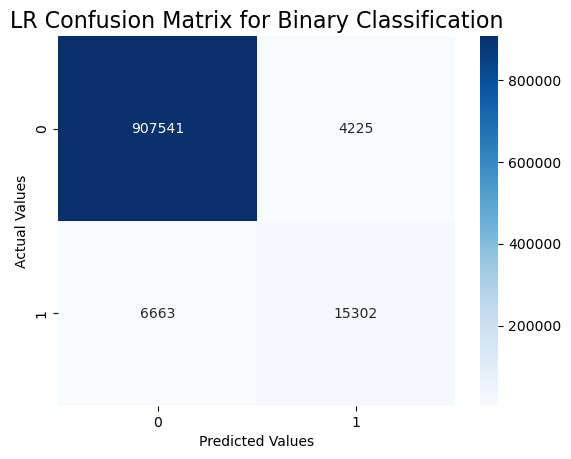

In [36]:
import seaborn as sns
cm_plot = sns.heatmap(lr_BC_confusion_matrix, annot=True, cmap='Blues', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('LR Confusion Matrix for Binary Classification', size=16)

#### Perceptron

In [37]:
p = Perceptron(random_state=0)
p.fit(X_train, y_train)
p_pred = p.predict(X_test)

In [38]:
p_BC_accuracy = accuracy_score(y_test, p_pred)
p_BC_recall = recall_score(y_test, p_pred)
p_BC_precision = precision_score(y_test, p_pred)
p_BC_f1 = f1_score(y_test, p_pred)

In [39]:
p_BC_confusion_matrix = confusion_matrix(y_test, p_pred)
class_accuracies = []
for i in range(p_BC_confusion_matrix.shape[0]):
    class_accuracies.append(p_BC_confusion_matrix[i,i]/sum(p_BC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_BC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,MaliciousTraffic,0.996971
1,BenignTraffic,0.596221


Text(0.5, 1.0, 'Perceptron Confusion Matrix for Binary Classification')

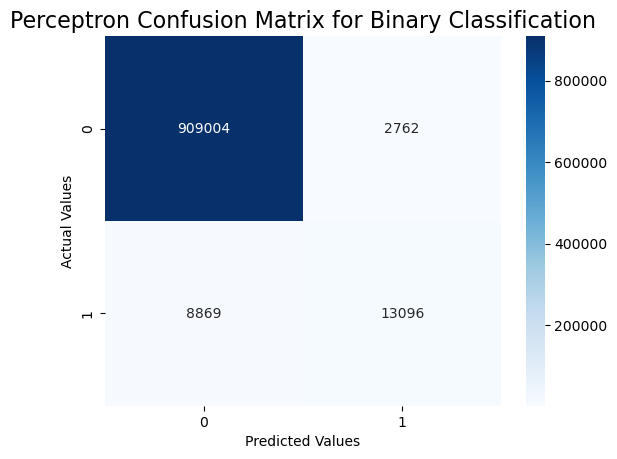

In [40]:
cm_plot = sns.heatmap(p_BC_confusion_matrix, annot=True, cmap='Blues', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Perceptron Confusion Matrix for Binary Classification', size=16)

#### AdaBoost

In [41]:
adb = AdaBoostClassifier(random_state=0)
adb.fit(X_train, y_train)
adb_pred = adb.predict(X_test)

In [42]:
adb_BC_accuracy = accuracy_score(y_test, adb_pred)
adb_BC_recall = recall_score(y_test, adb_pred)
adb_BC_precision = precision_score(y_test, adb_pred)
adb_BC_f1 = f1_score(y_test, adb_pred)

In [43]:
adb_BC_confusion_matrix = confusion_matrix(y_test, adb_pred)
class_accuracies = []
for i in range(adb_BC_confusion_matrix.shape[0]):
    class_accuracies.append(adb_BC_confusion_matrix[i,i]/sum(adb_BC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_BC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,MaliciousTraffic,0.997431
1,BenignTraffic,0.939085


Text(0.5, 1.0, 'AdaBoost Confusion Matrix for Binary Classification')

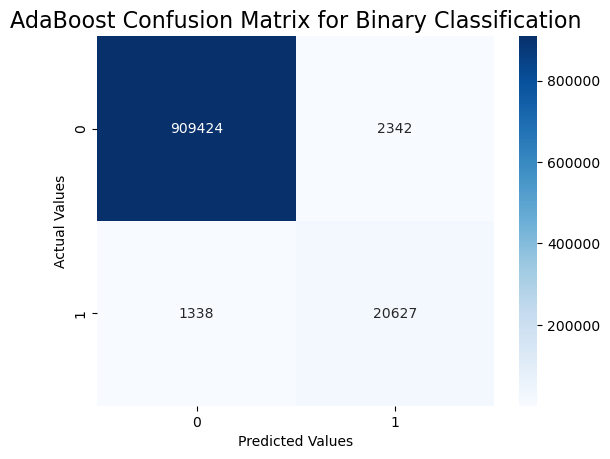

In [44]:
cm_plot = sns.heatmap(adb_BC_confusion_matrix, annot=True, cmap='Blues', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('AdaBoost Confusion Matrix for Binary Classification', size=16)

#### Random Forest

In [45]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [46]:
rf_BC_accuracy = accuracy_score(y_test, rf_pred)
rf_BC_recall = recall_score(y_test, rf_pred)
rf_BC_precision = precision_score(y_test, rf_pred)
rf_BC_f1 = f1_score(y_test, rf_pred)

In [47]:
rf_BC_confusion_matrix = confusion_matrix(y_test, rf_pred)
class_accuracies = []
for i in range(rf_BC_confusion_matrix.shape[0]):
    class_accuracies.append(rf_BC_confusion_matrix[i,i]/sum(rf_BC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_BC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,MaliciousTraffic,0.998451
1,BenignTraffic,0.960756


Text(0.5, 1.0, 'Random Forest Confusion Matrix for Binary Classification')

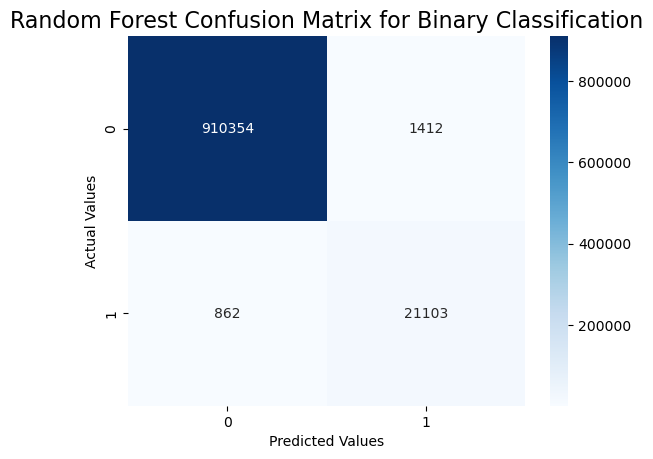

In [48]:
cm_plot = sns.heatmap(rf_BC_confusion_matrix, annot=True, cmap='Blues', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Random Forest Confusion Matrix for Binary Classification', size=16)

### Grouped Classification : 8 classes

In [31]:
#Creating the Dataframe for Grouped Classification
import copy
dataframe_GC = reduced_df.copy(deep=True)
for i in range(8):
    if i not in [1,2,3]:
        dataframe_GC.loc[dataframe_GC['label'].str.contains(attack_types_GC[i]), 'label'] = attack_types_GC[i]
    if i == 1:
        dataframe_GC.loc[dataframe_GC['label'].str.contains('DoS') & ~dataframe_GC['label'].str.contains('DDoS'), 'label'] = 'DoS'
    if i == 2:
        dataframe_GC.loc[dataframe_GC['label'].str.contains('Recon') | dataframe_GC['label'].str.contains('VulnerabilityScan'), 'label'] = 'Recon'
    if i == 3:
        #wb = ['SqlInjection', 'CommandInjection', 'Uploading_Attack','Backdoor_Malware', 'BrowserHijacking', 'XSS']
        dataframe_GC.loc[dataframe_GC['label'].str.contains('|'.join(wb)), 'label'] = 'Web-Based'
dataframe_GC

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,ack_flag_number,ack_count,syn_count,...,urg_count,rst_count,HTTP,UDP,Max,IAT,Number,Variance,Weight,label
0,0.208228,39635.00,17.0,64.0,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,8.312351e+07,9.5,0.0,141.55,DDoS
1,2.980976,1436693.74,17.0,64.0,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370738e+07,9.5,0.0,141.55,Mirai
2,0.000000,54.00,6.0,64.0,2.667254,2.667254,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,54.0,8.336257e+07,9.5,0.0,141.55,DDoS
3,6.099762,1500509.00,17.0,64.0,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370724e+07,9.5,0.0,141.55,Mirai
4,0.000000,0.00,1.0,64.0,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.314958e+07,9.5,0.0,141.55,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668648,0.000000,0.00,1.0,64.0,257.928481,257.928481,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312489e+07,9.5,0.0,141.55,DDoS
4668649,5.177342,108.00,6.0,64.0,0.386299,0.386299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54.0,8.295085e+07,9.5,0.0,141.55,DoS
4668650,0.000000,54.00,6.0,64.0,1.499815,1.499815,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,54.0,8.331443e+07,9.5,0.0,141.55,DDoS
4668651,0.000000,0.00,1.0,64.0,44.164748,44.164748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312483e+07,9.5,0.0,141.55,DDoS


In [32]:
dataframe_GC.value_counts('label')

label
DDoS             3398438
DoS               809091
Mirai             263398
BenignTraffic     109824
Spoofing           48659
Recon              35453
Web-Based           2487
BruteForce          1303
dtype: int64

In [108]:
#Spliting the dataset into train and test
X = dataframe_GC.iloc[:,:-1]
y = dataframe_GC.iloc[:,-1]

#attack_types_GC = ['DDoS', 'DoS', 'Recon', 'Web-Based', 'BruteForce', 'Spoofing', 'Mirai', 'BenignTraffic']
y = y.replace(to_replace = attack_types_GC, value = [index for index in range(len(attack_types_GC))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [109]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [57]:
#Don't run again
lr = LogisticRegression(random_state=0, max_iter=5000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [58]:
#Don't run again
filename = r'C:\Users\IshaA\OneDrive\Desktop\Design Project\lr_GC.sav'
pickle.dump(lr, open(filename, 'wb'))

In [110]:
filename = r'C:\Users\IshaA\OneDrive\Desktop\Design Project\lr_GC.sav'
lr_GC = pickle.load(open(filename, 'rb'))

In [111]:
lr_GC_pred = lr_GC.predict(X_test)
lr_GC_accuracy = accuracy_score(y_test, lr_GC_pred)
lr_GC_recall = recall_score(y_test, lr_GC_pred, average ='weighted')
lr_GC_precision = precision_score(y_test, lr_GC_pred, average = 'weighted')
lr_GC_f1 = f1_score(y_test, lr_GC_pred, average = 'weighted')

In [112]:
lr_GC_confusion_matrix = confusion_matrix(y_test, lr_GC_pred)
class_accuracies = []
for i in range(lr_GC_confusion_matrix.shape[0]):
    class_accuracies.append(lr_GC_confusion_matrix[i,i]/sum(lr_GC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_GC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,DDoS,0.995208
1,DoS,0.444771
2,Recon,0.363136
3,Web-Based,0.000000
4,BruteForce,0.000000
5,Spoofing,0.444205
6,Mirai,0.936371
7,BenignTraffic,0.870931


Text(0.5, 1.0, 'LR Confusion Matrix for Grouped Classification')

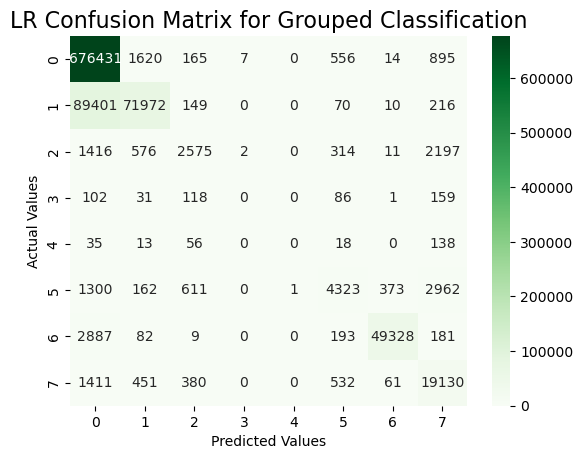

In [113]:
cm_plot = sns.heatmap(lr_GC_confusion_matrix, annot=True, cmap='Greens', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('LR Confusion Matrix for Grouped Classification', size=16)

#### Perceptron

In [116]:
p = Perceptron(random_state=0, max_iter=1000)
p.fit(X_train, y_train)
p_pred = p.predict(X_test)

In [117]:
p_GC_accuracy = accuracy_score(y_test, p_pred)
p_GC_recall = recall_score(y_test, p_pred, average = 'weighted')
p_GC_precision = precision_score(y_test, p_pred, average = 'weighted')
p_GC_f1 = f1_score(y_test, p_pred, average = 'weighted')

C:\Users\IshaA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
p_GC_confusion_matrix = confusion_matrix(y_test, p_pred)
class_accuracies = []
for i in range(p_GC_confusion_matrix.shape[0]):
    class_accuracies.append(p_GC_confusion_matrix[i,i]/sum(p_GC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_GC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,DDoS,0.862377
1,DoS,0.634664
2,Recon,0.296009
3,Web-Based,0.068410
4,BruteForce,0.000000
5,Spoofing,0.386252
6,Mirai,0.950190
7,BenignTraffic,0.654314


Text(0.5, 1.0, 'Perceptron Confusion Matrix for Grouped Classification')

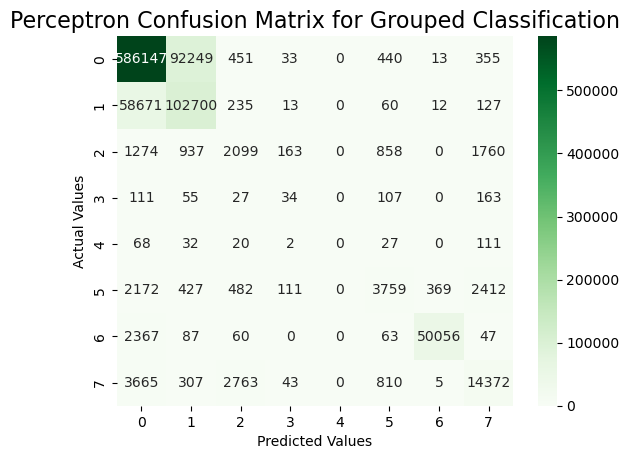

In [119]:
cm_plot = sns.heatmap(p_GC_confusion_matrix, annot=True, cmap='Greens', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Perceptron Confusion Matrix for Grouped Classification', size=16)

#### AdaBoost

In [120]:
adb = AdaBoostClassifier(random_state=0)
adb.fit(X_train, y_train)
adb_pred = adb.predict(X_test)

In [121]:
adb_GC_accuracy = accuracy_score(y_test, adb_pred)
adb_GC_recall = recall_score(y_test, adb_pred, average = 'weighted')
adb_GC_precision = precision_score(y_test, adb_pred, average = 'weighted')
adb_GC_f1 = f1_score(y_test, adb_pred, average = 'weighted')

C:\Users\IshaA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
adb_GC_confusion_matrix = confusion_matrix(y_test, adb_pred)
class_accuracies = []
for i in range(adb_GC_confusion_matrix.shape[0]):
    class_accuracies.append(adb_GC_confusion_matrix[i,i]/sum(adb_GC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_GC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,DDoS,0.034313
1,DoS,0.999913
2,Recon,0.345931
3,Web-Based,0.002012
4,BruteForce,0.000000
5,Spoofing,0.107069
6,Mirai,0.992920
7,BenignTraffic,0.954564


Text(0.5, 1.0, 'AdaBoost Confusion Matrix for Grouped Classification')

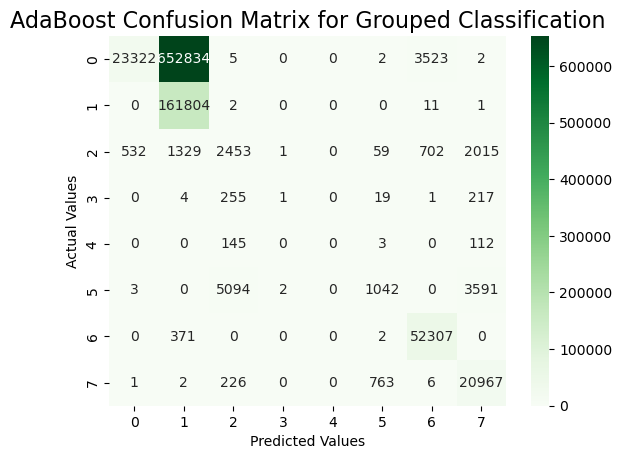

In [123]:
cm_plot = sns.heatmap(adb_GC_confusion_matrix, annot=True, cmap='Greens', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('AdaBoost Confusion Matrix for Grouped Classification', size=16)

#### Random Forest

In [124]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [125]:
rf_GC_accuracy = accuracy_score(y_test, rf_pred)
rf_GC_recall = recall_score(y_test, rf_pred, average = 'weighted')
rf_GC_precision = precision_score(y_test, rf_pred, average = 'weighted')
rf_GC_f1 = f1_score(y_test, rf_pred, average = 'weighted')

In [126]:
rf_GC_confusion_matrix = confusion_matrix(y_test, rf_pred)
class_accuracies = []
for i in range(rf_GC_confusion_matrix.shape[0]):
    class_accuracies.append(rf_GC_confusion_matrix[i,i]/sum(rf_GC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_GC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,DDoS,0.999949
1,DoS,0.999833
2,Recon,0.834579
3,Web-Based,0.424547
4,BruteForce,0.530769
5,Spoofing,0.868475
6,Mirai,0.999962
7,BenignTraffic,0.978511


Text(0.5, 1.0, 'Random Forest Confusion Matrix for Grouped Classification')

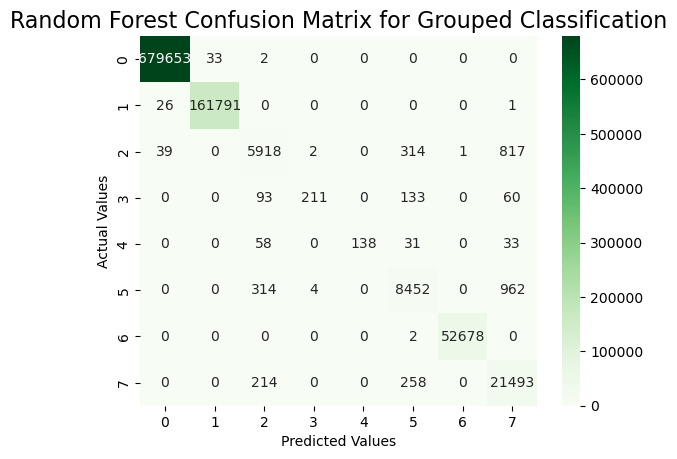

In [127]:
cm_plot = sns.heatmap(rf_GC_confusion_matrix, annot=True, cmap='Greens', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Random Forest Confusion Matrix for Grouped Classification', size=16)

### Multi-Class Classification : 34 classes

In [33]:
#Creating the Dataframe for Multi-Class Classification
dataframe_MC = reduced_df.copy(deep=True)

In [129]:
#Spliting the dataset into train and test
X = dataframe_MC.iloc[:,:-1]
y = dataframe_MC.iloc[:,-1]

#attack_types_GC = ['DDoS', 'DoS', 'Recon', 'Web-Based', 'Brute Force', 'Spoofing', 'Mirai', 'BenignTraffic']
y = y.replace(to_replace = attack_types_MC, value = [index for index in range(len(attack_types_MC))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [130]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [85]:
#Don't run again
lr = LogisticRegression(random_state=0, max_iter=5000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [92]:
#Don't run again
filename = r'C:\Users\IshaA\OneDrive\Desktop\Design Project\lr_MC.sav'
pickle.dump(lr, open(filename, 'wb'))

In [131]:
filename = r'C:\Users\IshaA\OneDrive\Desktop\Design Project\lr_MC.sav'
lr_MC = pickle.load(open(filename, 'rb'))

In [132]:
lr_MC_pred = lr_MC.predict(X_test)
lr_MC_accuracy = accuracy_score(y_test, lr_MC_pred)
lr_MC_recall = recall_score(y_test, lr_MC_pred, average = 'weighted')
lr_MC_precision = precision_score(y_test, lr_MC_pred, average = 'weighted')
lr_MC_f1 = f1_score(y_test, lr_MC_pred, average = 'weighted')

C:\Users\IshaA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
lr_MC_confusion_matrix = confusion_matrix(y_test, lr_MC_pred)
class_accuracies = []
for i in range(lr_MC_confusion_matrix.shape[0]):
    class_accuracies.append(lr_MC_confusion_matrix[i,i]/sum(lr_MC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_MC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,DDoS-UDP_Flood,0.973643
1,Mirai-udpplain,0.978665
2,DDoS-SynonymousIP_Flood,0.728176
3,DDoS-ICMP_Flood,0.998382
4,Mirai-greeth_flood,0.944542
5,DDoS-PSHACK_Flood,0.995995
6,Mirai-greip_flood,0.106965
7,DDoS-SYN_Flood,0.939840
8,DDoS-TCP_Flood,0.987894
9,DoS-SYN_Flood,0.480679


Text(0.5, 1.0, 'LR Confusion Matrix for Multi Classification')

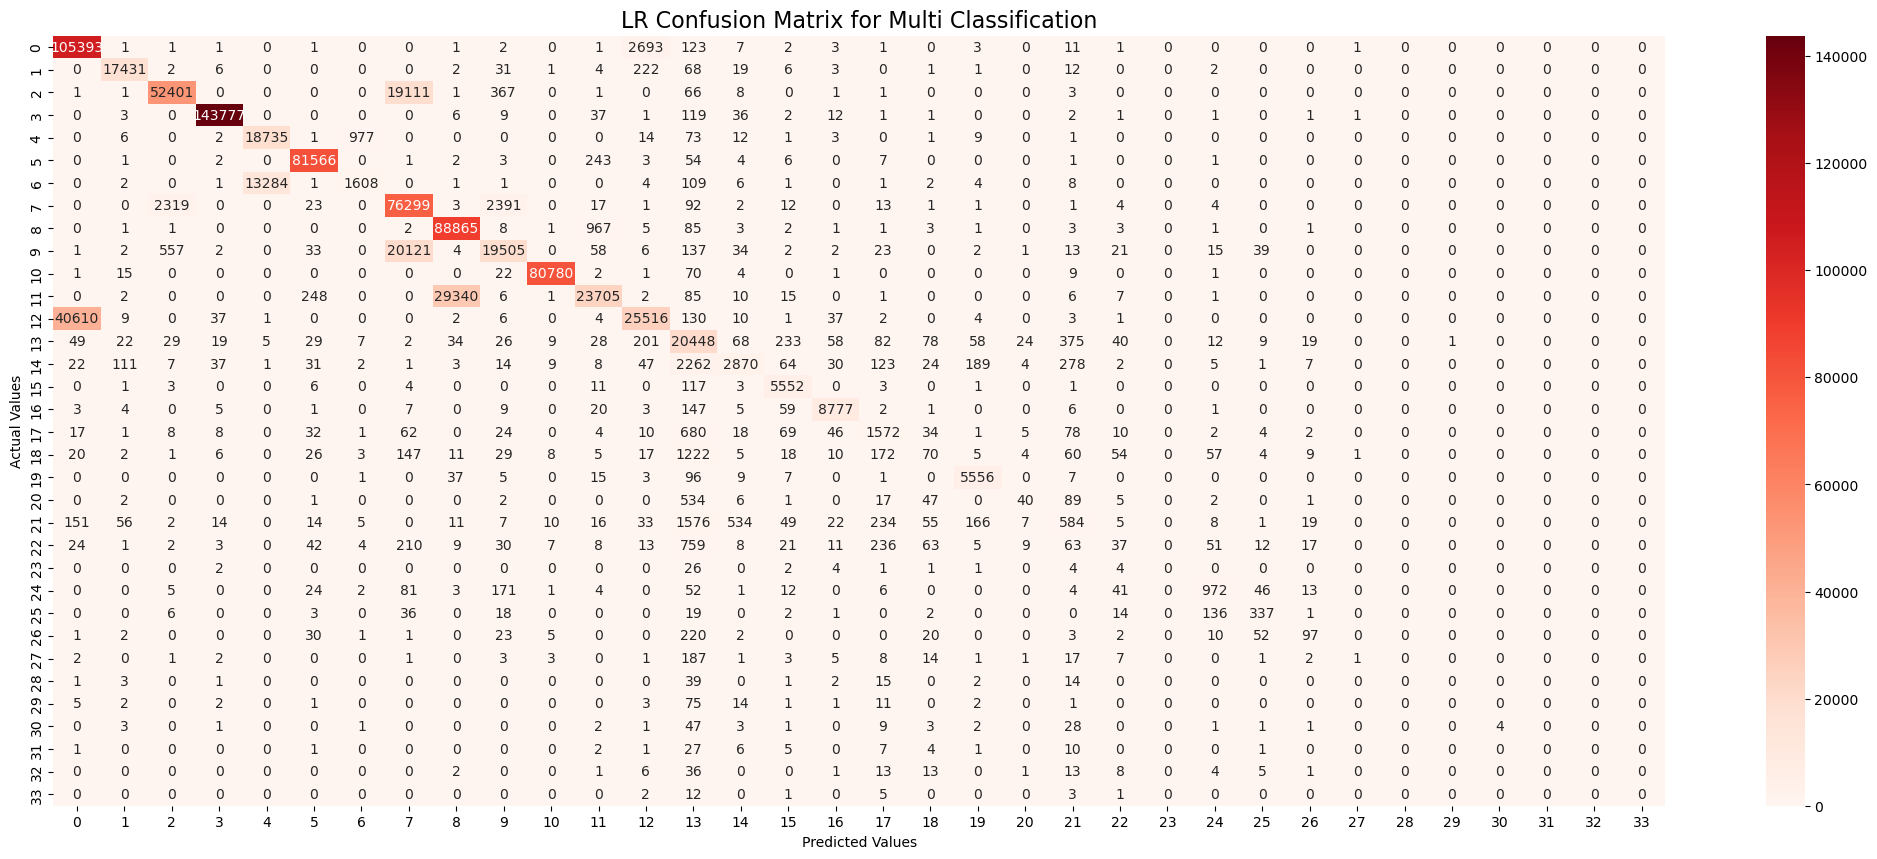

In [134]:
from matplotlib import pyplot 
pyplot.figure(figsize=(26,10))
cm_plot = sns.heatmap(lr_MC_confusion_matrix, annot=True, cmap='Reds', fmt='d')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('LR Confusion Matrix for Multi Classification', size=16)

#### Perceptron

In [135]:
p = Perceptron(random_state=0, max_iter=1000)
p.fit(X_train, y_train)
p_pred = p.predict(X_test)

In [136]:
p_MC_accuracy = accuracy_score(y_test, p_pred)
p_MC_recall = recall_score(y_test, p_pred, average = 'weighted')
p_MC_precision = precision_score(y_test, p_pred, average = 'weighted')
p_MC_f1 = f1_score(y_test, p_pred, average = 'weighted')

C:\Users\IshaA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
p_MC_confusion_matrix = confusion_matrix(y_test, p_pred)
class_accuracies = []
for i in range(p_MC_confusion_matrix.shape[0]):
    class_accuracies.append(p_MC_confusion_matrix[i,i]/sum(p_MC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_MC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,DDoS-UDP_Flood,0.001968
1,Mirai-udpplain,0.983437
2,DDoS-SynonymousIP_Flood,0.917290
3,DDoS-ICMP_Flood,0.989709
4,Mirai-greeth_flood,0.970557
5,DDoS-PSHACK_Flood,0.995653
6,Mirai-greip_flood,0.006852
7,DDoS-SYN_Flood,0.915672
8,DDoS-TCP_Flood,0.282600
9,DoS-SYN_Flood,0.302159


Text(0.5, 1.0, 'Perceptron Confusion Matrix for Multi Classification')

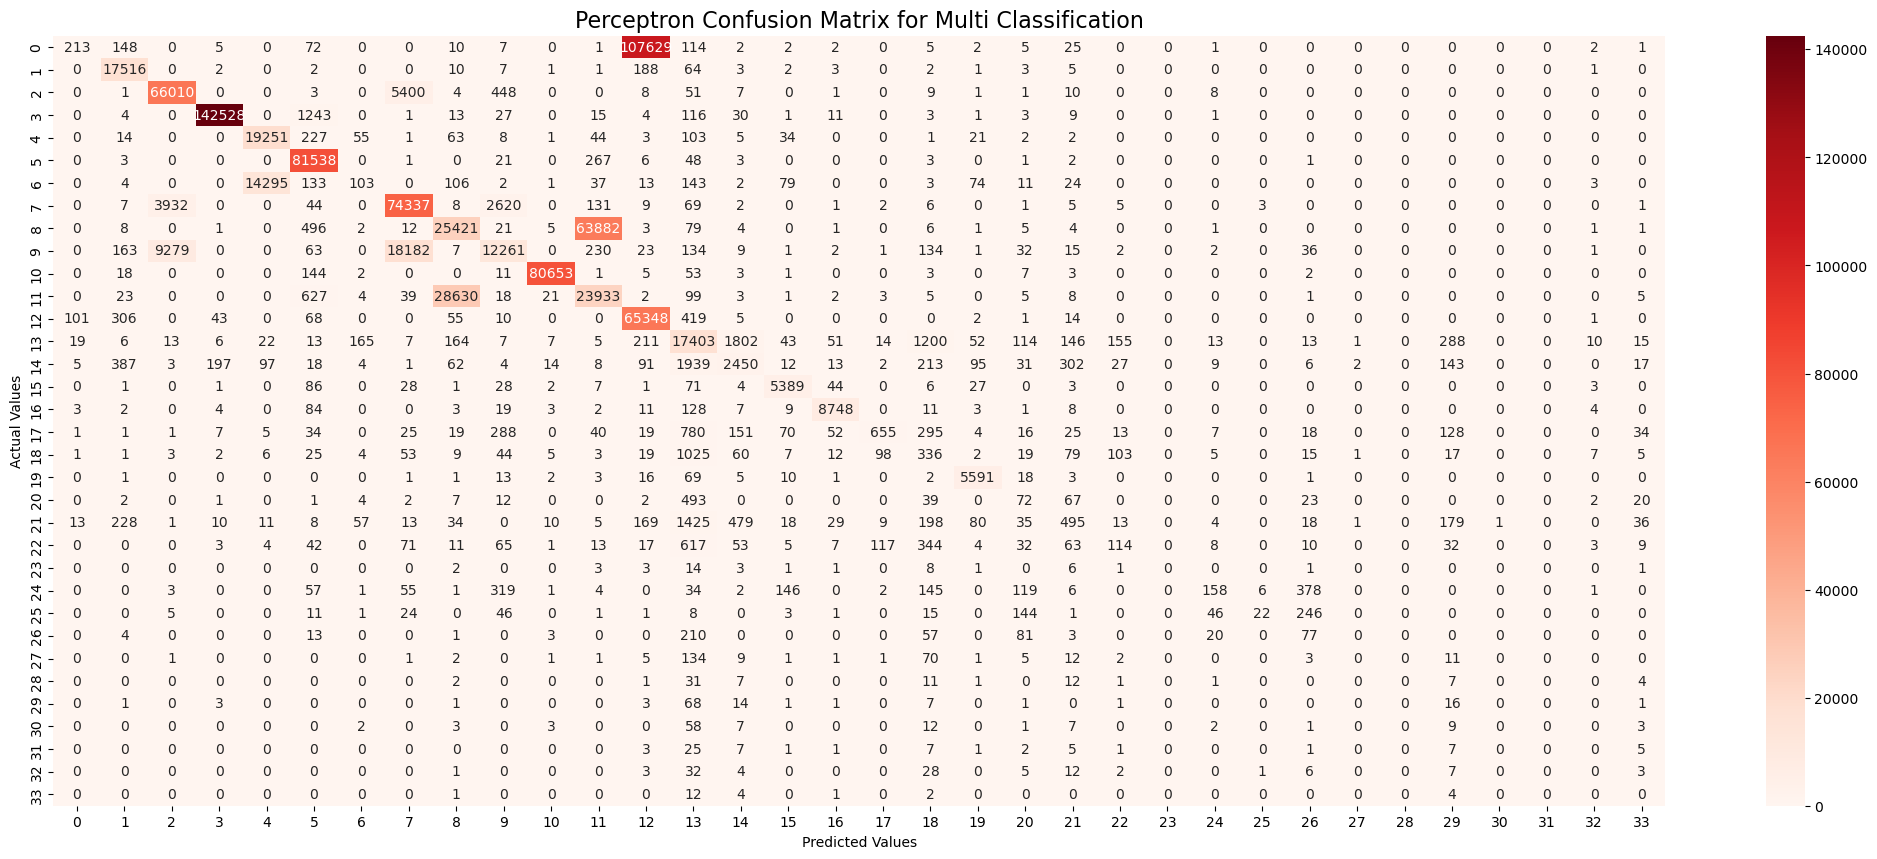

In [138]:
pyplot.figure(figsize=(26,10))
cm_plot = sns.heatmap(p_MC_confusion_matrix, annot=True, cmap='Reds', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Perceptron Confusion Matrix for Multi Classification', size=16)

#### AdaBoost

In [139]:
adb = AdaBoostClassifier(random_state=0)
adb.fit(X_train, y_train)
adb_pred = adb.predict(X_test)

In [140]:
adb_MC_accuracy = accuracy_score(y_test, adb_pred)
adb_MC_recall = recall_score(y_test, adb_pred, average = 'weighted')
adb_MC_precision = precision_score(y_test, adb_pred, average = 'weighted')
adb_MC_f1 = f1_score(y_test, adb_pred, average = 'weighted')

C:\Users\IshaA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
adb_MC_confusion_matrix = confusion_matrix(y_test, adb_pred)
class_accuracies = []
for i in range(adb_MC_confusion_matrix.shape[0]):
    class_accuracies.append(adb_MC_confusion_matrix[i,i]/sum(adb_MC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_MC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,DDoS-UDP_Flood,0.949190
1,Mirai-udpplain,0.968166
2,DDoS-SynonymousIP_Flood,0.998666
3,DDoS-ICMP_Flood,0.932338
4,Mirai-greeth_flood,0.990270
5,DDoS-PSHACK_Flood,0.995885
6,Mirai-greip_flood,0.003925
7,DDoS-SYN_Flood,0.000123
8,DDoS-TCP_Flood,0.993274
9,DoS-SYN_Flood,0.000000


Text(0.5, 1.0, 'AdaBoost Confusion Matrix for Multi Classification')

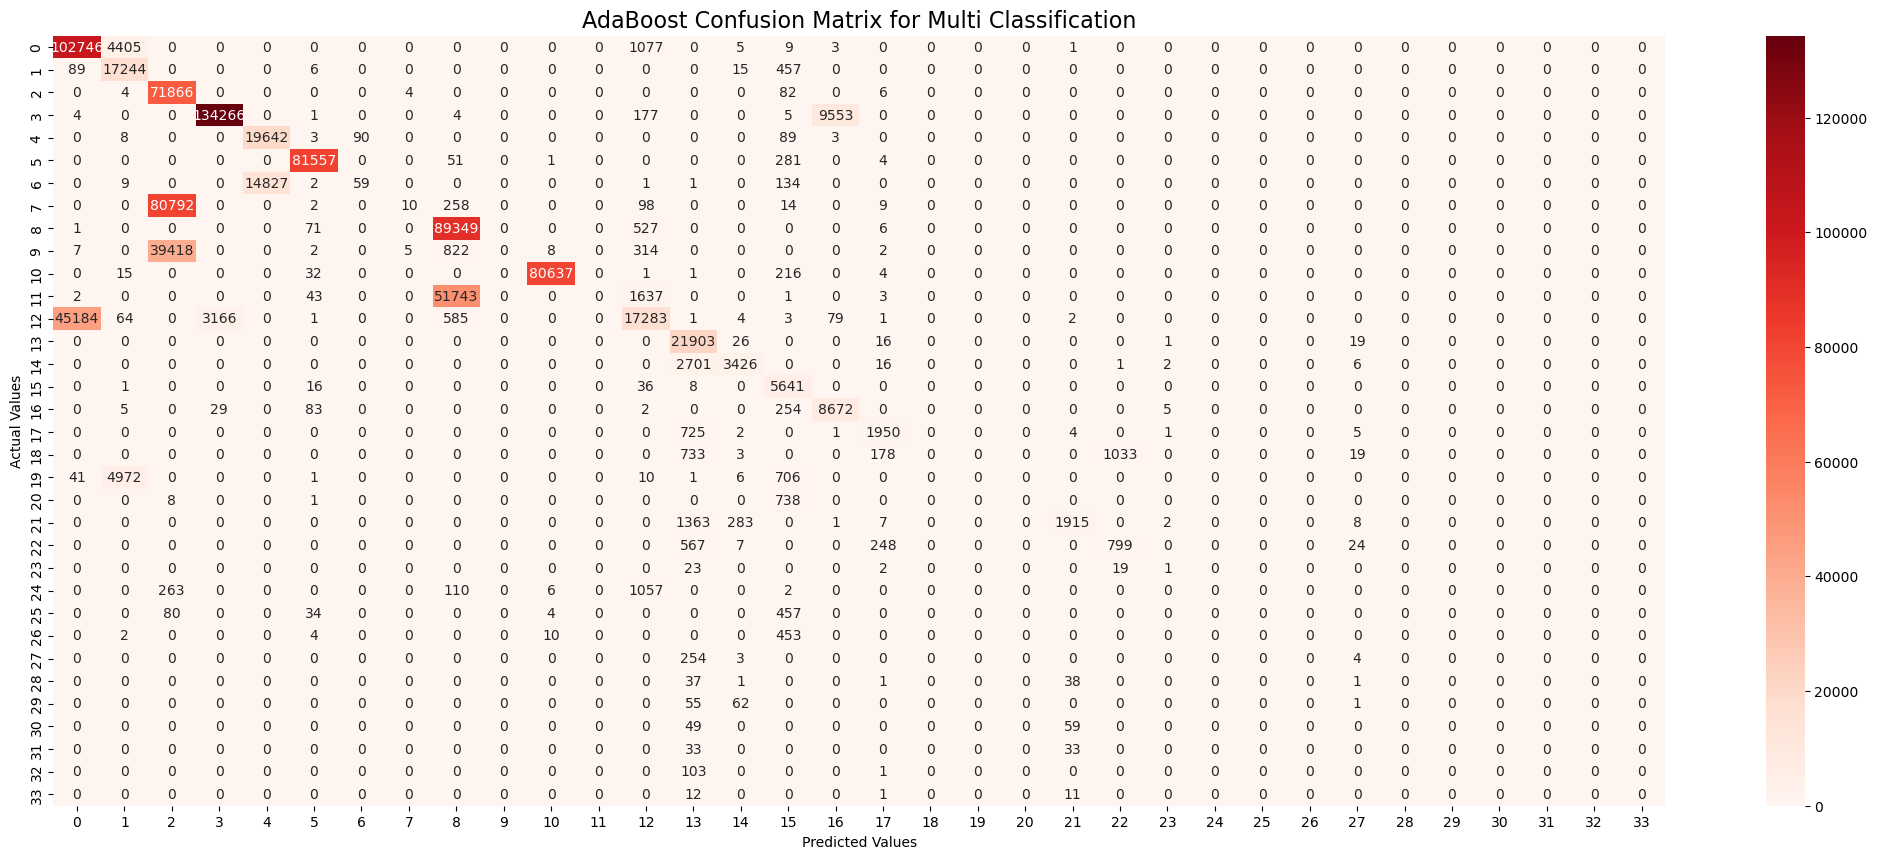

In [142]:
pyplot.figure(figsize=(26,10))
cm_plot = sns.heatmap(adb_MC_confusion_matrix, annot=True, cmap='Reds', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('AdaBoost Confusion Matrix for Multi Classification', size=16)

#### Random Forest

In [143]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [144]:
rf_MC_accuracy = accuracy_score(y_test, rf_pred)
rf_MC_recall = recall_score(y_test, rf_pred, average = 'weighted')
rf_MC_precision = precision_score(y_test, rf_pred, average = 'weighted')
rf_MC_f1 = f1_score(y_test, rf_pred, average = 'weighted')

In [145]:
rf_MC_confusion_matrix = confusion_matrix(y_test, rf_pred)
class_accuracies = []
for i in range(rf_MC_confusion_matrix.shape[0]):
    class_accuracies.append(rf_MC_confusion_matrix[i,i]/sum(rf_MC_confusion_matrix[i,:]))
pd.DataFrame({'Classes' : attack_types_MC, 'Class Accuracies' : class_accuracies})

,Classes,Class Accuracies
0,DDoS-UDP_Flood,0.999806
1,Mirai-udpplain,0.999607
2,DDoS-SynonymousIP_Flood,0.999653
3,DDoS-ICMP_Flood,0.999931
4,Mirai-greeth_flood,0.999042
5,DDoS-PSHACK_Flood,0.999805
6,Mirai-greip_flood,0.998603
7,DDoS-SYN_Flood,0.999667
8,DDoS-TCP_Flood,0.999911
9,DoS-SYN_Flood,0.999655


Text(0.5, 1.0, 'Random Forest Confusion Matrix for Multi Classification')

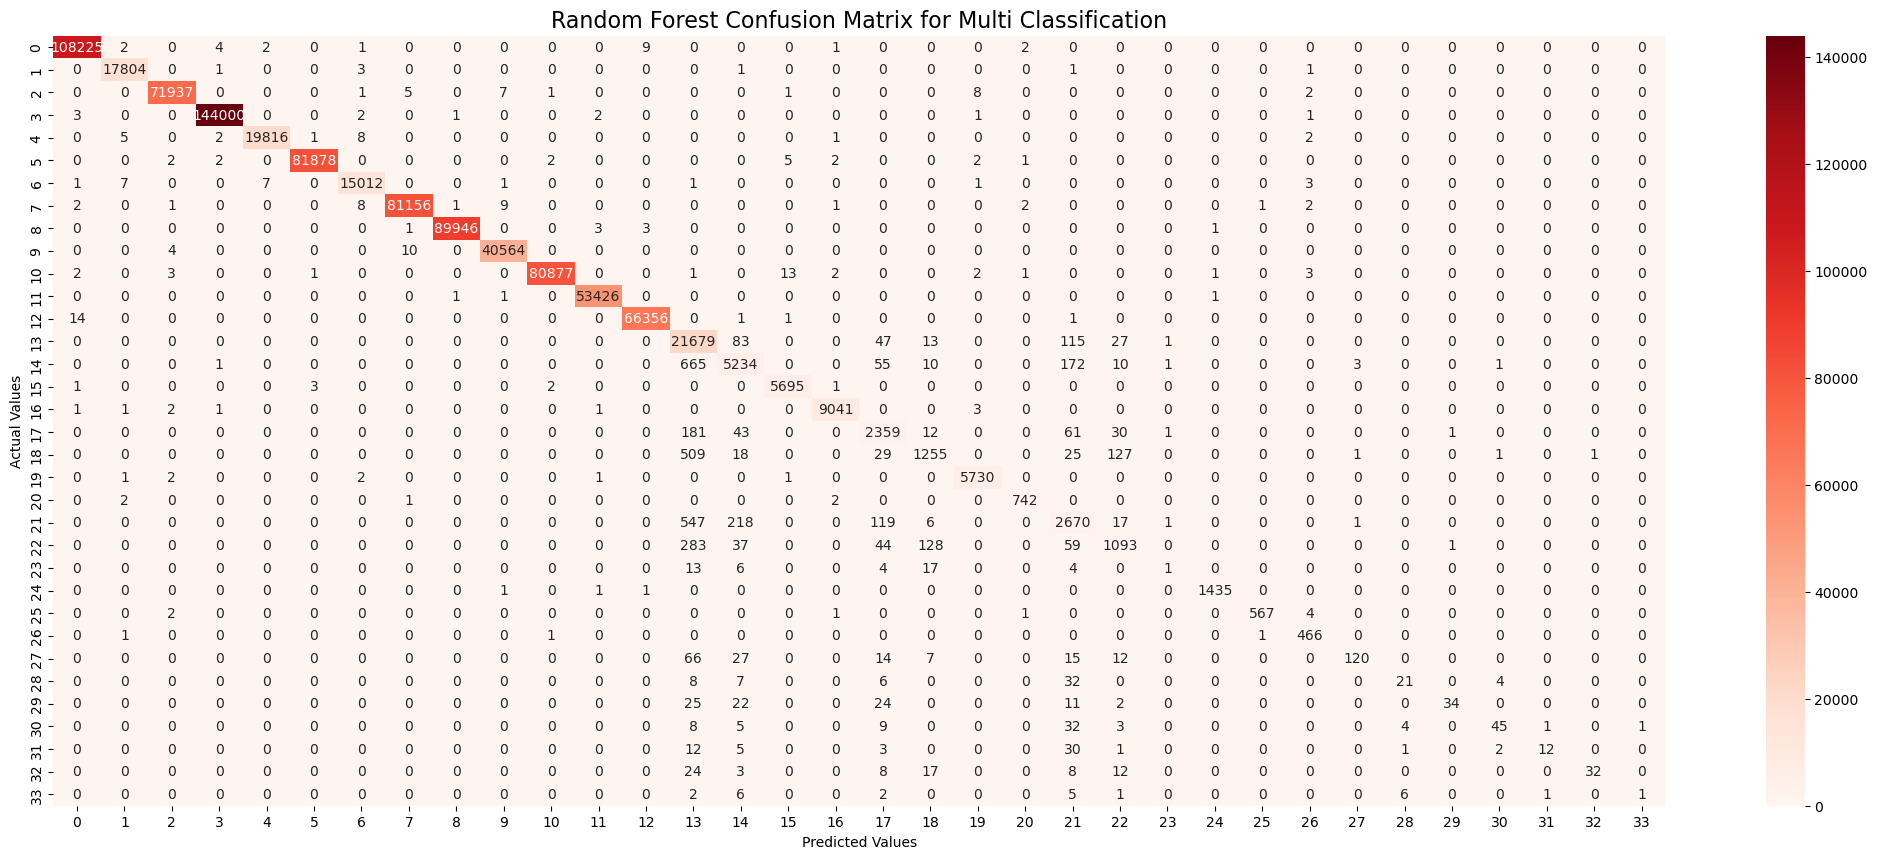

In [146]:
pyplot.figure(figsize=(26,10))
cm_plot = sns.heatmap(rf_MC_confusion_matrix, annot=True, cmap='Reds', fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Random Forest Confusion Matrix for Multi Classification', size=16)

In [147]:
index = ['Accuracy_MC', 'Precision_MC', 'Recall_MC', 'F1 Score_MC', 'Accuracy_GC', 'Precision_GC', 'Recall_GC', 'F1 Score_GC', 'Accuracy_BC', 'Precision_BC', 'Recall_BC', 'F1 Score_BC']
lr_metric = [lr_MC_accuracy, lr_MC_precision, lr_MC_recall, lr_MC_f1, lr_GC_accuracy, lr_GC_precision, lr_GC_recall, lr_GC_f1, lr_BC_accuracy, lr_BC_precision, lr_BC_recall, lr_BC_f1]
p_metric = [p_MC_accuracy, p_MC_precision, p_MC_recall, p_MC_f1, p_GC_accuracy, p_GC_precision, p_GC_recall, p_GC_f1, p_BC_accuracy, p_BC_precision, p_BC_recall, p_BC_f1]
adb_metric = [adb_MC_accuracy, adb_MC_precision, adb_MC_recall, adb_MC_f1, adb_GC_accuracy, adb_GC_precision, adb_GC_recall, adb_GC_f1, adb_BC_accuracy, adb_BC_precision, adb_BC_recall, adb_BC_f1]
rf_metric = [rf_MC_accuracy, rf_MC_precision, rf_MC_recall, rf_MC_f1, rf_GC_accuracy, rf_GC_precision, rf_GC_recall, rf_GC_f1, rf_BC_accuracy, rf_BC_precision, rf_BC_recall, rf_BC_f1]
metrics_df = pd.DataFrame({'Metrics' : index, 'Logistic Regression' : lr_metric, 'Perceptron' : p_metric, 'AdaBoost' : adb_metric, 'Random Forest' : rf_metric})

In [148]:
metrics_df.set_index('Metrics')

,Logistic Regression,Perceptron,AdaBoost,Random Forest
Metrics,,,,
Accuracy_MC,0.838034,0.696815,0.705739,0.995178
Precision_MC,0.856922,0.722741,0.664662,0.995066
Recall_MC,0.838034,0.696815,0.705739,0.995178
F1 Score_MC,0.820986,0.653118,0.628944,0.994910
Accuracy_GC,0.882223,0.813047,0.280483,0.996362
Precision_GC,0.889000,0.824859,0.824597,0.996373
Recall_GC,0.882223,0.813047,0.280483,0.996362
F1 Score_GC,0.865620,0.817397,0.184125,0.996253
Accuracy_BC,0.988339,0.987544,0.996059,0.997565


In [ ]:
del reduced_df

### CNN

#### Binary Classification

In [34]:
dataframe_BC

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,ack_flag_number,ack_count,syn_count,...,urg_count,rst_count,HTTP,UDP,Max,IAT,Number,Variance,Weight,label
0,0.208228,39635.00,17.0,64.0,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,8.312351e+07,9.5,0.0,141.55,MaliciousTraffic
1,2.980976,1436693.74,17.0,64.0,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370738e+07,9.5,0.0,141.55,MaliciousTraffic
2,0.000000,54.00,6.0,64.0,2.667254,2.667254,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,54.0,8.336257e+07,9.5,0.0,141.55,MaliciousTraffic
3,6.099762,1500509.00,17.0,64.0,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370724e+07,9.5,0.0,141.55,MaliciousTraffic
4,0.000000,0.00,1.0,64.0,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.314958e+07,9.5,0.0,141.55,MaliciousTraffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668648,0.000000,0.00,1.0,64.0,257.928481,257.928481,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312489e+07,9.5,0.0,141.55,MaliciousTraffic
4668649,5.177342,108.00,6.0,64.0,0.386299,0.386299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54.0,8.295085e+07,9.5,0.0,141.55,MaliciousTraffic
4668650,0.000000,54.00,6.0,64.0,1.499815,1.499815,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,54.0,8.331443e+07,9.5,0.0,141.55,MaliciousTraffic
4668651,0.000000,0.00,1.0,64.0,44.164748,44.164748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312483e+07,9.5,0.0,141.55,MaliciousTraffic


In [35]:
#Spliting the reduced dataset into train and test
X = dataframe_BC.iloc[:,:-1]
y = dataframe_BC.iloc[:,-1]

#attack_types_BC = ["MaliciousTraffic", "BenignTraffic"]
y = y.replace(to_replace = attack_types_BC, value = [index for index in range(len(attack_types_BC))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [36]:
# Data preprocessing - scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [65]:
# Reshaping the data to fit the Conv1D input shape
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(20, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
46687/46687 [==============================] - 357s 8ms/step - loss: 0.0183 - accuracy: 0.9919 - val_loss: 0.0160 - val_accuracy: 0.9929
Epoch 2/10
46687/46687 [==============================] - 321s 7ms/step - loss: 0.0161 - accuracy: 0.9929 - val_loss: 0.0151 - val_accuracy: 0.9932
Epoch 3/10
46687/46687 [==============================] - 343s 7ms/step - loss: 0.0157 - accuracy: 0.9930 - val_loss: 0.0149 - val_accuracy: 0.9932
Epoch 4/10
46687/46687 [==============================] - 318s 7ms/step - loss: 0.0156 - accuracy: 0.9931 - val_loss: 0.0146 - val_accuracy: 0.9933
Epoch 5/10
46687/46687 [==============================] - 343s 7ms/step - loss: 0.0153 - accuracy: 0.9932 - val_loss: 0.0150 - val_accuracy: 0.9932
Epoch 6/10
46687/46687 [==============================] - 384s 8ms/step - loss: 0.0152 - accuracy: 0.9932 - val_loss: 0.0148 - val_accuracy: 0.9936
Epoch 7/10
46687/46687 [==============================] - 355s 8ms/step - loss: 0.0152 - accuracy: 0.9933 - val_

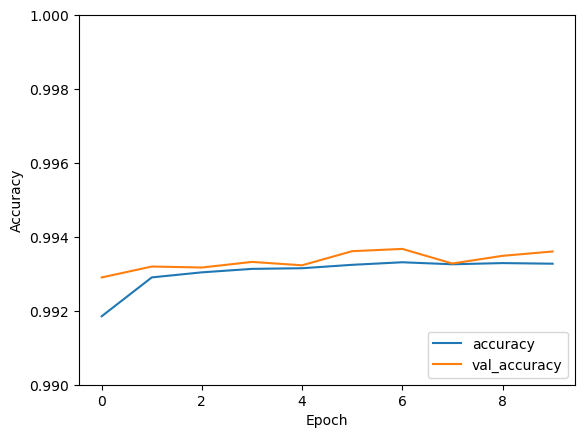

In [70]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.99, 1])
plt.legend(loc='lower right')

In [73]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

29180/29180 [==============================] - 83s 3ms/step - loss: 0.0145 - accuracy: 0.9935


#### Grouped Classification

In [74]:
dataframe_GC

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,ack_flag_number,ack_count,syn_count,...,urg_count,rst_count,HTTP,UDP,Max,IAT,Number,Variance,Weight,label
0,0.208228,39635.00,17.0,64.0,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,8.312351e+07,9.5,0.0,141.55,DDoS
1,2.980976,1436693.74,17.0,64.0,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370738e+07,9.5,0.0,141.55,Mirai
2,0.000000,54.00,6.0,64.0,2.667254,2.667254,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,54.0,8.336257e+07,9.5,0.0,141.55,DDoS
3,6.099762,1500509.00,17.0,64.0,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370724e+07,9.5,0.0,141.55,Mirai
4,0.000000,0.00,1.0,64.0,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.314958e+07,9.5,0.0,141.55,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668648,0.000000,0.00,1.0,64.0,257.928481,257.928481,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312489e+07,9.5,0.0,141.55,DDoS
4668649,5.177342,108.00,6.0,64.0,0.386299,0.386299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54.0,8.295085e+07,9.5,0.0,141.55,DoS
4668650,0.000000,54.00,6.0,64.0,1.499815,1.499815,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,54.0,8.331443e+07,9.5,0.0,141.55,DDoS
4668651,0.000000,0.00,1.0,64.0,44.164748,44.164748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312483e+07,9.5,0.0,141.55,DDoS


In [75]:
#Spliting the dataset into train and test
X = dataframe_GC.iloc[:,:-1]
y = dataframe_GC.iloc[:,-1]

#attack_types_GC = ['DDoS', 'DoS', 'Recon', 'Web-Based', 'BruteForce', 'Spoofing', 'Mirai', 'BenignTraffic']
y = y.replace(to_replace = attack_types_GC, value = [index for index in range(len(attack_types_GC))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [76]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# Reshape the data to fit the Conv1D input shape (assuming 20 features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Number of classes
num_classes = len(attack_types_GC)

# Model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification output using softmax

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
46687/46687 [==============================] - 335s 7ms/step - loss: 0.1237 - accuracy: 0.9480 - val_loss: 0.0603 - val_accuracy: 0.9781
Epoch 2/10
46687/46687 [==============================] - 320s 7ms/step - loss: 0.1062 - accuracy: 0.9559 - val_loss: 0.0441 - val_accuracy: 0.9848
Epoch 3/10
46687/46687 [==============================] - 375s 8ms/step - loss: 0.1233 - accuracy: 0.9478 - val_loss: 0.1286 - val_accuracy: 0.9454
Epoch 4/10
46687/46687 [==============================] - 370s 8ms/step - loss: 0.0892 - accuracy: 0.9637 - val_loss: 0.1278 - val_accuracy: 0.9449
Epoch 5/10
46687/46687 [==============================] - 328s 7ms/step - loss: 0.0999 - accuracy: 0.9592 - val_loss: 0.0457 - val_accuracy: 0.9832
Epoch 6/10
46687/46687 [==============================] - 355s 8ms/step - loss: 0.0487 - accuracy: 0.9828 - val_loss: 0.0401 - val_accuracy: 0.9851
Epoch 7/10
46687/46687 [==============================] - 345s 7ms/step - loss: 0.0545 - accuracy: 0.9793 - val_

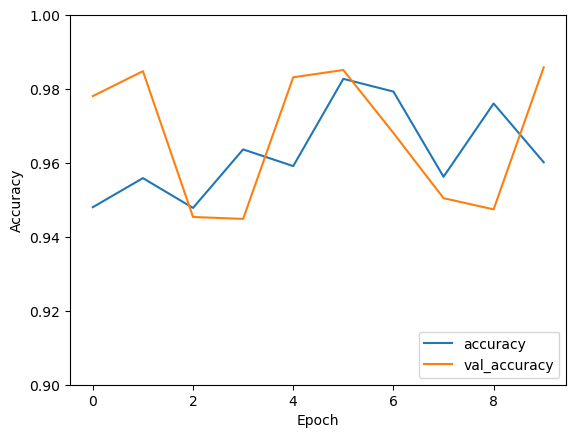

In [82]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

In [83]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

29180/29180 [==============================] - 88s 3ms/step - loss: 0.0374 - accuracy: 0.9860


#### Multi-class Classification

In [84]:
dataframe_MC

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,ack_flag_number,ack_count,syn_count,...,urg_count,rst_count,HTTP,UDP,Max,IAT,Number,Variance,Weight,label
0,0.208228,39635.00,17.0,64.0,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,8.312351e+07,9.5,0.0,141.55,DDoS-UDP_Flood
1,2.980976,1436693.74,17.0,64.0,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370738e+07,9.5,0.0,141.55,Mirai-udpplain
2,0.000000,54.00,6.0,64.0,2.667254,2.667254,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,54.0,8.336257e+07,9.5,0.0,141.55,DDoS-SynonymousIP_Flood
3,6.099762,1500509.00,17.0,64.0,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370724e+07,9.5,0.0,141.55,Mirai-udpplain
4,0.000000,0.00,1.0,64.0,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.314958e+07,9.5,0.0,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668648,0.000000,0.00,1.0,64.0,257.928481,257.928481,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312489e+07,9.5,0.0,141.55,DDoS-ICMP_Flood
4668649,5.177342,108.00,6.0,64.0,0.386299,0.386299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54.0,8.295085e+07,9.5,0.0,141.55,DoS-TCP_Flood
4668650,0.000000,54.00,6.0,64.0,1.499815,1.499815,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,54.0,8.331443e+07,9.5,0.0,141.55,DDoS-PSHACK_Flood
4668651,0.000000,0.00,1.0,64.0,44.164748,44.164748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312483e+07,9.5,0.0,141.55,DDoS-ICMP_Flood


In [85]:
#Spliting the dataset into train and test
X = dataframe_MC.iloc[:,:-1]
y = dataframe_MC.iloc[:,-1]

#attack_types_GC = ['DDoS', 'DoS', 'Recon', 'Web-Based', 'Brute Force', 'Spoofing', 'Mirai', 'BenignTraffic']
y = y.replace(to_replace = attack_types_MC, value = [index for index in range(len(attack_types_MC))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [86]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
# Reshape the data to fit the Conv1D input shape (assuming 20 features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Number of classes
num_classes = len(attack_types_MC)

# Model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification output using softmax

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
46687/46687 [==============================] - 209s 4ms/step - loss: 0.1904 - accuracy: 0.9222 - val_loss: 0.1014 - val_accuracy: 0.9653
Epoch 2/10
46687/46687 [==============================] - 241s 5ms/step - loss: 0.0946 - accuracy: 0.9633 - val_loss: 0.0777 - val_accuracy: 0.9684
Epoch 3/10
46687/46687 [==============================] - 243s 5ms/step - loss: 0.0907 - accuracy: 0.9653 - val_loss: 0.0764 - val_accuracy: 0.9685
Epoch 4/10
46687/46687 [==============================] - 260s 6ms/step - loss: 0.0814 - accuracy: 0.9711 - val_loss: 0.0794 - val_accuracy: 0.9621
Epoch 5/10
46687/46687 [==============================] - 235s 5ms/step - loss: 0.0726 - accuracy: 0.9772 - val_loss: 0.0573 - val_accuracy: 0.9830
Epoch 6/10
46687/46687 [==============================] - 243s 5ms/step - loss: 0.0745 - accuracy: 0.9766 - val_loss: 0.0587 - val_accuracy: 0.9828
Epoch 7/10
46687/46687 [==============================] - 254s 5ms/step - loss: 0.0738 - accuracy: 0.9769 - val_

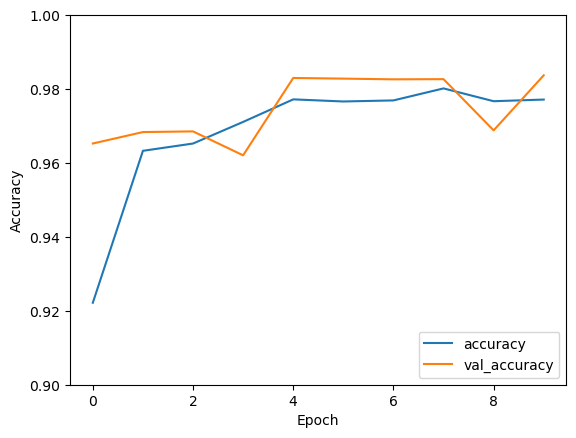

In [94]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

In [95]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

29180/29180 [==============================] - 64s 2ms/step - loss: 0.0603 - accuracy: 0.9834


### LSTM

#### Binary Classification

In [130]:
dataframe_BC

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,ack_flag_number,ack_count,syn_count,...,urg_count,rst_count,HTTP,UDP,Max,IAT,Number,Variance,Weight,label
0,0.208228,39635.00,17.0,64.0,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,8.312351e+07,9.5,0.0,141.55,MaliciousTraffic
1,2.980976,1436693.74,17.0,64.0,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370738e+07,9.5,0.0,141.55,MaliciousTraffic
2,0.000000,54.00,6.0,64.0,2.667254,2.667254,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,54.0,8.336257e+07,9.5,0.0,141.55,MaliciousTraffic
3,6.099762,1500509.00,17.0,64.0,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370724e+07,9.5,0.0,141.55,MaliciousTraffic
4,0.000000,0.00,1.0,64.0,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.314958e+07,9.5,0.0,141.55,MaliciousTraffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668648,0.000000,0.00,1.0,64.0,257.928481,257.928481,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312489e+07,9.5,0.0,141.55,MaliciousTraffic
4668649,5.177342,108.00,6.0,64.0,0.386299,0.386299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54.0,8.295085e+07,9.5,0.0,141.55,MaliciousTraffic
4668650,0.000000,54.00,6.0,64.0,1.499815,1.499815,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,54.0,8.331443e+07,9.5,0.0,141.55,MaliciousTraffic
4668651,0.000000,0.00,1.0,64.0,44.164748,44.164748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312483e+07,9.5,0.0,141.55,MaliciousTraffic


In [131]:
#Spliting the reduced dataset into train and test
X = dataframe_BC.iloc[:,:-1]
y = dataframe_BC.iloc[:,-1]

#attack_types_BC = ["MaliciousTraffic", "BenignTraffic"]
y = y.replace(to_replace = attack_types_BC, value = [index for index in range(len(attack_types_BC))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [132]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Reshape the data to fit the LSTM input shape 
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(1, 20), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [140]:
#Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
46687/46687 [==============================] - 227s 5ms/step - loss: 0.0263 - accuracy: 0.9904 - val_loss: 0.0159 - val_accuracy: 0.9929
Epoch 2/10
46687/46687 [==============================] - 224s 5ms/step - loss: 0.0159 - accuracy: 0.9929 - val_loss: 0.0151 - val_accuracy: 0.9932
Epoch 3/10
46687/46687 [==============================] - 238s 5ms/step - loss: 0.0152 - accuracy: 0.9932 - val_loss: 0.0146 - val_accuracy: 0.9935
Epoch 4/10
46687/46687 [==============================] - 226s 5ms/step - loss: 0.0148 - accuracy: 0.9934 - val_loss: 0.0145 - val_accuracy: 0.9936
Epoch 5/10
46687/46687 [==============================] - 236s 5ms/step - loss: 0.0146 - accuracy: 0.9935 - val_loss: 0.0142 - val_accuracy: 0.9936
Epoch 6/10
46687/46687 [==============================] - 226s 5ms/step - loss: 0.0145 - accuracy: 0.9936 - val_loss: 0.0141 - val_accuracy: 0.9937
Epoch 7/10
46687/46687 [==============================] - 230s 5ms/step - loss: 0.0143 - accuracy: 0.9936 - val_

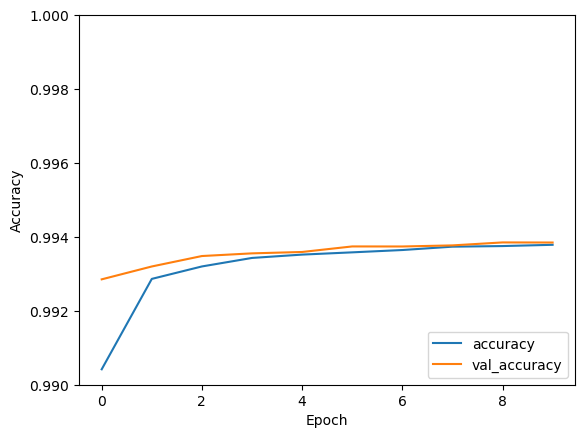

In [142]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.99, 1])
plt.legend(loc='lower right')

In [143]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

29180/29180 [==============================] - 53s 2ms/step - loss: 0.0137 - accuracy: 0.9939


#### Grouped Classification

In [144]:
dataframe_GC

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,ack_flag_number,ack_count,syn_count,...,urg_count,rst_count,HTTP,UDP,Max,IAT,Number,Variance,Weight,label
0,0.208228,39635.00,17.0,64.0,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,8.312351e+07,9.5,0.0,141.55,DDoS
1,2.980976,1436693.74,17.0,64.0,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370738e+07,9.5,0.0,141.55,Mirai
2,0.000000,54.00,6.0,64.0,2.667254,2.667254,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,54.0,8.336257e+07,9.5,0.0,141.55,DDoS
3,6.099762,1500509.00,17.0,64.0,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370724e+07,9.5,0.0,141.55,Mirai
4,0.000000,0.00,1.0,64.0,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.314958e+07,9.5,0.0,141.55,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668648,0.000000,0.00,1.0,64.0,257.928481,257.928481,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312489e+07,9.5,0.0,141.55,DDoS
4668649,5.177342,108.00,6.0,64.0,0.386299,0.386299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54.0,8.295085e+07,9.5,0.0,141.55,DoS
4668650,0.000000,54.00,6.0,64.0,1.499815,1.499815,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,54.0,8.331443e+07,9.5,0.0,141.55,DDoS
4668651,0.000000,0.00,1.0,64.0,44.164748,44.164748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312483e+07,9.5,0.0,141.55,DDoS


In [145]:
#Spliting the dataset into train and test
X = dataframe_GC.iloc[:,:-1]
y = dataframe_GC.iloc[:,-1]

#attack_types_GC = ['DDoS', 'DoS', 'Recon', 'Web-Based', 'BruteForce', 'Spoofing', 'Mirai', 'BenignTraffic']
y = y.replace(to_replace = attack_types_GC, value = [index for index in range(len(attack_types_GC))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [146]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
from keras.utils import to_categorical

# Reshape the data to fit the LSTM input shape 
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train_categorical = to_categorical(y_train, num_classes=len(attack_types_GC))

num_classes = len(attack_types_GC)

# Model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(1, 20), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [154]:
#Train the model
history = model.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
46687/46687 [==============================] - 245s 5ms/step - loss: 0.3547 - accuracy: 0.8493 - val_loss: 0.1837 - val_accuracy: 0.9398
Epoch 2/10
46687/46687 [==============================] - 236s 5ms/step - loss: 0.0940 - accuracy: 0.9733 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 3/10
46687/46687 [==============================] - 243s 5ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0359 - val_accuracy: 0.9882
Epoch 4/10
46687/46687 [==============================] - 237s 5ms/step - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.0311 - val_accuracy: 0.9890
Epoch 5/10
46687/46687 [==============================] - 244s 5ms/step - loss: 0.0314 - accuracy: 0.9889 - val_loss: 0.0274 - val_accuracy: 0.9898
Epoch 6/10
46687/46687 [==============================] - 249s 5ms/step - loss: 0.0290 - accuracy: 0.9894 - val_loss: 0.0262 - val_accuracy: 0.9901
Epoch 7/10
46687/46687 [==============================] - 248s 5ms/step - loss: 0.0279 - accuracy: 0.9897 - val_

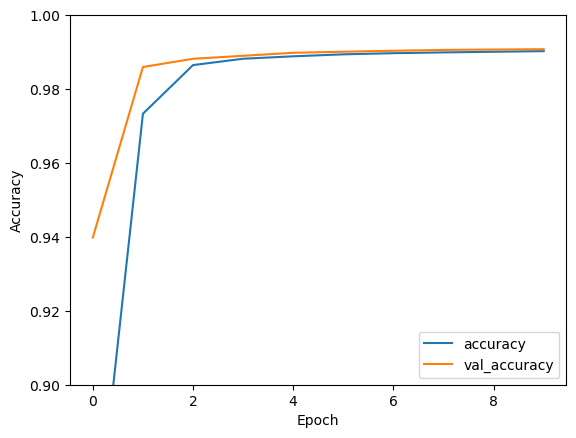

In [155]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

In [159]:
y_test_categorical = to_categorical(y_test, num_classes=len(attack_types_GC))
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_categorical)

29180/29180 [==============================] - 53s 2ms/step - loss: 0.0239 - accuracy: 0.9909


#### Multi-Class Classification

In [160]:
dataframe_MC

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,ack_flag_number,ack_count,syn_count,...,urg_count,rst_count,HTTP,UDP,Max,IAT,Number,Variance,Weight,label
0,0.208228,39635.00,17.0,64.0,6269.844445,6269.844445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.0,8.312351e+07,9.5,0.0,141.55,DDoS-UDP_Flood
1,2.980976,1436693.74,17.0,64.0,870.403002,870.403002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370738e+07,9.5,0.0,141.55,Mirai-udpplain
2,0.000000,54.00,6.0,64.0,2.667254,2.667254,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,54.0,8.336257e+07,9.5,0.0,141.55,DDoS-SynonymousIP_Flood
3,6.099762,1500509.00,17.0,64.0,457.658903,457.658903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,554.0,8.370724e+07,9.5,0.0,141.55,Mirai-udpplain
4,0.000000,0.00,1.0,64.0,0.646368,0.646368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.314958e+07,9.5,0.0,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668648,0.000000,0.00,1.0,64.0,257.928481,257.928481,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312489e+07,9.5,0.0,141.55,DDoS-ICMP_Flood
4668649,5.177342,108.00,6.0,64.0,0.386299,0.386299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54.0,8.295085e+07,9.5,0.0,141.55,DoS-TCP_Flood
4668650,0.000000,54.00,6.0,64.0,1.499815,1.499815,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,54.0,8.331443e+07,9.5,0.0,141.55,DDoS-PSHACK_Flood
4668651,0.000000,0.00,1.0,64.0,44.164748,44.164748,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,42.0,8.312483e+07,9.5,0.0,141.55,DDoS-ICMP_Flood


In [161]:
#Spliting the dataset into train and test
X = dataframe_MC.iloc[:,:-1]
y = dataframe_MC.iloc[:,-1]

#attack_types_GC = ['DDoS', 'DoS', 'Recon', 'Web-Based', 'Brute Force', 'Spoofing', 'Mirai', 'BenignTraffic']
y = y.replace(to_replace = attack_types_MC, value = [index for index in range(len(attack_types_MC))])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [162]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Reshape the data to fit the LSTM input shape 
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train_categorical = to_categorical(y_train, num_classes=len(attack_types_MC))

num_classes = len(attack_types_MC)

# Model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(1, 20), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [164]:
#Train the model
history = model.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
46687/46687 [==============================] - 242s 5ms/step - loss: 0.5717 - accuracy: 0.7653 - val_loss: 0.4270 - val_accuracy: 0.8020
Epoch 2/10
46687/46687 [==============================] - 237s 5ms/step - loss: 0.3523 - accuracy: 0.8506 - val_loss: 0.2370 - val_accuracy: 0.9139
Epoch 3/10
46687/46687 [==============================] - 238s 5ms/step - loss: 0.1968 - accuracy: 0.9292 - val_loss: 0.1154 - val_accuracy: 0.9587
Epoch 4/10
46687/46687 [==============================] - 259s 6ms/step - loss: 0.1164 - accuracy: 0.9578 - val_loss: 0.0888 - val_accuracy: 0.9648
Epoch 5/10
46687/46687 [==============================] - 289s 6ms/step - loss: 0.0976 - accuracy: 0.9630 - val_loss: 0.0797 - val_accuracy: 0.9670
Epoch 6/10
46687/46687 [==============================] - 249s 5ms/step - loss: 0.0889 - accuracy: 0.9654 - val_loss: 0.0750 - val_accuracy: 0.9700
Epoch 7/10
46687/46687 [==============================] - 239s 5ms/step - loss: 0.0836 - accuracy: 0.9669 - val_

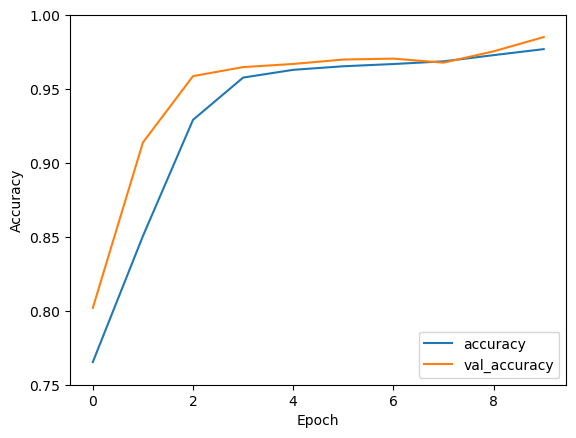

In [165]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')

In [166]:
y_test_categorical = to_categorical(y_test, num_classes=len(attack_types_MC))
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_categorical)

29180/29180 [==============================] - 53s 2ms/step - loss: 0.0546 - accuracy: 0.9849
